# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# **Apparent Elevation**


***

Referring to Section 2.7.1, a signal transmitted through the atmosphere bends toward the earth. In many radar applications, this would require transmission of the signal at a higher elevation angle in order to have the energy intercept the target, as shown in Figure 2.9.  This angle is referred to as the apparent elevation angle, as the target appears to be at a different angle than its true position.

The amount of correction to the true target elevation is

$$
\Delta \theta = -\int\limits_{h}^{\infty} \frac{n'(z)}{n(z) \tan \phi}\,dz \hspace{0.5in} \mathrm{(deg)}
$$

where 

$$
    \cos \phi = \frac{c}{(r_e+z) \, n(z)}, \hspace{0.2in} c = (r_e + h) \, n(h) \cos \theta.
$$


Since the refraction in the atmosphere is largely determined by the lower layers, a model based on the exponential atmosphere for terrestrial propagation allows the index of refraction at some altitude, $z$, to be expressed as

$$
n(z) = 1 + \alpha \, e^{-\beta z},
$$

where $\alpha = 0.000315$, and $\beta = 0.1361$.

***
Begin by getting the library path

In [1]:
import lib_path

Set the true elevation (degrees) and the height (km) and create an array of 100 values using the `linspace` routine from `scipy`

In [2]:
from numpy import linspace

true_elevation = 20.0

max_height = 5

height = linspace(0, max_height, 100)

Calculate the apparent elevation for each height value

In [3]:
from Libs.wave_propagation import refraction

apparent_elevation = [refraction.apparent_elevation(true_elevation, h) for h in height]

Also calculate the apparent elevation with the approximate method

In [4]:
kwargs = {'theta_true': true_elevation, 'height': height}

apparent_elevation_approximate = refraction.apparent_elevation_approximate(**kwargs)

Display the apparent elevation due to refraction using the `matplotlib` routines

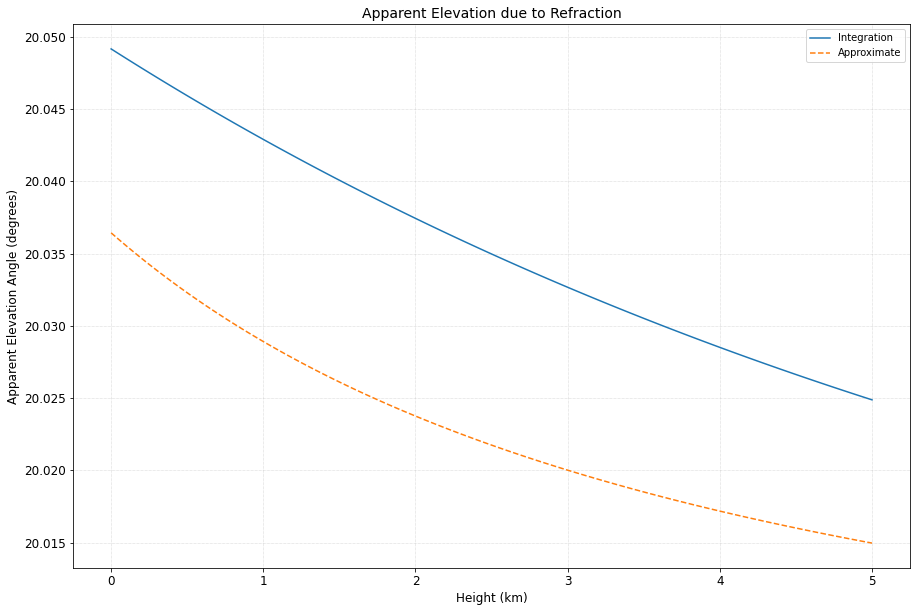

In [5]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Display the results

plt.plot(height, apparent_elevation, label='Integration')

plt.plot(height, apparent_elevation_approximate, '--', label = 'Approximate')



# Set the plot title and labels

plt.title('Apparent Elevation due to Refraction', size=14)

plt.xlabel('Height (km)', size=12)

plt.ylabel('Apparent Elevation Angle (degrees)', size=12)



# Set the tick label size

plt.tick_params(labelsize=12)



# Turn on the legend

plt.legend(loc='upper right', prop={'size': 10})



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)